# Woz U Data Science Program
## Final Project
## Leo Jacquez and Sarah Mangrum

# Import Packages

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind

# Import Data

In [3]:
attrition = pd.read_csv('Final_dataset_Attrition.csv')

# url: https://www.kaggle.com/singhnproud77/hr-attrition-prediction/notebook
# site source

# Question Setup

* Working with IBM HR attrition data, who is most likely to quit their job at IBM?  
* Use findings to help forecast attrition rates and recommend possible solutions to minimize employee turnover and interruptions in work flow where viable.

# View Data and Gather Information for Analyses

## View beginning and end of data file

In [4]:
attrition.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN


In [5]:
attrition.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
1465,52,No,Travel_Rarely,Sales,3,Male,2,4,Manager,1,...,05-06-1987,NaN,Salary,OFFICE,3,2,No,Job Portal,Part Time,NaN
1466,55,No,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,...,20-01-1985,NaN,Work Accident,WFH,1,1,No,Walk-in,FullTime,NaN
1467,55,No,Travel_Rarely,Sales,26,Male,2,5,Manager,4,...,17-02-1985,NaN,Work Accident,OFFICE,2,1,No,Recruiter,Part Time,NaN
1468,58,No,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,...,29-06-1984,NaN,Work Environment,WFH,2,2,Yes,Job Event,Part Time,NaN
1469,58,Yes,Travel_Rarely,Research & Development,23,Female,3,3,Healthcare Representative,4,...,08-02-1981,NaN,Work Environment,WFH,4,3,Yes,Job Portal,FullTime,NaN


## View available dataset information
* columns names
* no. of rows: 1470
* no. of columns: 33
* variable types

In [6]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   object 
 6   JobInvolvement           1470 non-null   int64  
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   JobSatisfaction          1470 non-null   int64  
 10  MaritalStatus            1470 non-null   object 
 11  MonthlyIncome            1470 non-null   int64  
 12  NumCompaniesWorked       1470 non-null   int64  
 13  OverTime                 1470 non-null   object 
 14  PercentSalaryHike       

# Variable Description Key
* "Age" = The age of the employee
* "Attrition" = Whether the employee has attrited or not
* "BusinessTravel" = Whether the employee used to travel for business or not
* "Department" = Which department the employee was employed under
* "DistanceFromHome" = The distance the employee travels to reach job on a day to day basis
* "Gender" = Gender of the employee
* "JobInvolvement" = The involvement rating of an employee over the job handled
* "JobLevel" = Level at which the employee is working
* "JobRole" = The roles and resposibilites of the employee
* "JobSatisfaction" = Satisfaction rating of the employee for the job
* "MaritalStatus" = Marital status of the employee
* "MonthlyIncome" = Monthly income of the employee
* "NumCompaniesWorked" = Number of companies the employees has worked for
* "OverTime" = Whether working Overtime or not
* "PercentSalaryHike" = Percentage salary hike since their appointment in the company
* "PerformanceRating" = Performance rating
* "StockOptionLevel" = Level of opted for sharing the stock
* "TotalWorkingYears" = Total years worked by the employee
* "TrainingTimesLastYear" = How many trainings the employee has undergone
* "YearsAtCompany" = Years spent at the present organization
* "YearsSinceLastPromotion" = Time in years since last promotion
* "YearsWithCurrManager" = Years working under their current manager
* "Higher_Education" = Higher education level of the employee
* "Date_of_Hire" = Date of hire of the employee in the current organization
* "Date_of_termination" = Date of termination from the organization
* "Status_of_leaving" = Reason for leaving the organization
* "Mode_of_work" = WFH or WFO
* "Leaves" = Total permitted leaves taken by the employee
* "Absenteeism" = Total days absent for the employee
* "Work_accident" = Work accident if any
* "Source_of_hire" = Source of hire
* "Job_Mode" = Working full time, part time or contractual

## View descriptive statistics of the dataset

In [7]:
attrition.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism,Unnamed: 32
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,0.0,1470.000000,1470.000000,0.0
mean,36.923810,9.192517,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,NaN,2.568707,1.525170,NaN
std,9.135373,8.106864,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,NaN,1.716171,1.097856,NaN
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,NaN,1.000000,1.000000,NaN
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,NaN,3.000000,2.000000,NaN
75%,43.000000,14.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,NaN,4.000000,2.000000,NaN
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,NaN,5.000000,3.000000,NaN


In [8]:
attrition.mean()

Age                          36.923810
DistanceFromHome              9.192517
JobInvolvement                2.729932
JobLevel                      2.063946
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
PercentSalaryHike            15.209524
PerformanceRating             3.153741
StockOptionLevel              0.793878
TotalWorkingYears            11.279592
TrainingTimesLastYear         2.799320
YearsAtCompany                7.008163
YearsSinceLastPromotion       2.187755
YearsWithCurrManager          4.123129
Date_of_termination                NaN
Leaves                        2.568707
Absenteeism                   1.525170
Unnamed: 32                        NaN
dtype: float64

# Data Wrangling

## Check data for missing values

In [9]:
attrition.isna().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Higher_Education              0
Date_of_Hire                  0
Date_of_termination        1470
Status_of_leaving             0
Mode_of_work                  0
Leaves                        0
Absenteeism                   0
Work_accident                 0
Source_of_Hire                0
Job_mode

## Drop/Remove NaN Columns and date column

In [10]:
attrition = attrition.drop(["Date_of_Hire", "Date_of_termination", "Unnamed: 32"], axis = 1)
attrition

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,0,0,Graduation,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,0,0,Graduation,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,0,0,Post-Graduation,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,0,0,PHD,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,0,0,PHD,Better Opportunity,WFH,5,2,No,Job Event,Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,No,Travel_Rarely,Sales,3,Male,2,4,Manager,1,...,1,16,Post-Graduation,Salary,OFFICE,3,2,No,Job Portal,Part Time
1466,55,No,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,...,4,13,Post-Graduation,Work Accident,WFH,1,1,No,Walk-in,FullTime
1467,55,No,Travel_Rarely,Sales,26,Male,2,5,Manager,4,...,2,13,Post-Graduation,Work Accident,OFFICE,2,1,No,Recruiter,Part Time
1468,58,No,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,...,1,8,PHD,Work Environment,WFH,2,2,Yes,Job Event,Part Time


## Next step Recoding variables
### Recode following variables: 
### 'Age', 'Attrition', 'Department', 'DistanceFromHome', 'Gender', 'MonthlyIncome','Higher_Education'

In [24]:
# Use .describe() to get stats on the min and max for the 'Age' so we can break the data down evenly into bins if possible. 
attrition['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

### Recode function for 'Age'
* 1 = Under 22 = Gen Z
* 2 = 23 - 38 = Millenials
* 3 = 39 - 54 = Gen X
* 4 = 55 - 74 = Baby Boomers

In [11]:
# Recode function for 'Age'
def Age(a):
        if a <= 22:
            return 1
        elif a > 22 and a <= 38:
            return 2
        elif a > 38 and a <= 54:
            return 3
        elif a >54:
            return 4
        else:
            return 5

In [22]:
# use .value_counts() to see the levels for 'Attrition'
attrition['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### Recode function for 'Attrition'
* 1 = No = Did NOT quit their job
* 2 = Yes = Quit their job
* False for anything other than 1 or 2 present

In [12]:
# Recode function for 'Attrition'
def Attrit(a):
    if a == 'No':
        return 1
    elif a == 'Yes':
        return 0
    else:
        return False

In [23]:
# use .value_counts() to see the levels for 'Department'
attrition['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

### Recode function for 'Department'
* 1 = Research & Development
* 2 = Sales
* 3 = Human Resources
* False for anything else

In [13]:
def Dep(a):
        if a == "Research & Development":
            return 1
        elif a == "Sales":
            return 2
        elif a == "Human Resources":
            return 3
        else:
            return False

In [21]:
# Use .describe() to get stats on the min and max for the 'DistanceFromHome' so we can break the data down evenly into bins if possible. 
attrition['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

### Recode function for 'DistanceFromHome'
* 1 = Below 5
* 2 = 6 - 10 
* 3 = 11 - 15
* 4 = 16 - 20
* 5 = 21 - 25
* 6 = 26 - 30
* 7 = anything else

In [14]:
def DistanceFromHome(d):
        if d <= 5:
            return 1
        elif d > 5 and d <= 10:
            return 2
        elif d > 10 and d <= 15:
            return 3
        elif d > 15 and d <= 20:
            return 4
        elif d > 20 and d <= 25:
            return 5
        elif d > 25 and d <= 30:
            return 6
        else:
            return 7

In [25]:
# use .value_counts() to see the levels for "Gender"
attrition['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

### Recode function for 'Gender'
* 0 = Male
* 1 = Female
* 2 = Anything else

In [15]:
def Gender(g):
        if g == 'Male':
            return 0
        elif g == 'Female':
            return 1
        else: 
            return 2

In [26]:
# Use .describe() to get stats on the min and max for the 'MonthlyIncome' so we can break the data down evenly into bins if possible. 
attrition['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

### Recode function for 'MonthlyIncome'
* 1 = 0 - 4000 per month
* 2 = 4001 - 8000
* 3 = 8001 - 12000
* 4 = 12001 - 16000
* 5 = 16001 - 20000
* 0 = anything else

In [27]:
# Recode function for 'MonthlyIncome'
def Income(i):
    if i <= 4000:
        return 1
    elif i > 4000 and i <= 8000:
        return 2
    elif i > 8001 and i <= 12000:
        return 3
    elif i > 12001 and i <= 16000:
        return 4
    elif i > 16001 and i <= 20000:
        return 5
    else:
        return 0

In [18]:
# use .value_counts() to see the levels for Higher_Education
attrition['Higher_Education'].value_counts()

Post-Graduation    387
Graduation         367
12th               358
PHD                358
Name: Higher_Education, dtype: int64

### Recode function for 'Higher_Education'
* 1 = 12th = High School Grad
* 2 = Graduate = Bachelors degree
* 3 = Post-Graduate = Masters Degree
* 4 = PhD = Doctorate
* 0 = Anything Else

In [19]:
def ed(e):
    if e == '12th':
        return 1
    elif e == 'Graduation':
        return 2
    elif e == 'Post-Graduation':
        return 3
    elif e == 'PHD':
        return 4
    else:
        return 0

# Run the functions!

In [29]:
attrition['AgeR'] = attrition['Age'].apply(Age)
attrition['AttritionR'] = attrition['Attrition'].apply(Attrit)
attrition['DepartmentR'] = attrition['Department'].apply(Dep)
attrition['DistanceFromHomeR'] = attrition['DistanceFromHome'].apply(DistanceFromHome)
attrition['GenderR'] = attrition['Gender'].apply(Gender)
attrition['MonthlyIncomeR'] = attrition['MonthlyIncome'].apply(Income)
attrition['Higher_EducationR'] = attrition['Higher_Education'].apply(ed)

 'Age', 'Attrition', 'Department', 'DistanceFromHome', 'Gender', 'MonthlyIncome','Higher_Education'

In [30]:
attrition

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Work_accident,Source_of_Hire,Job_mode,AgeR,AttritionR,DepartmentR,DistanceFromHomeR,GenderR,MonthlyIncomeR,Higher_EducationR
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,No,Job Event,Contract,2,0,1,1,0,1,2
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,No,Recruiter,Part Time,1,1,1,3,0,1,2
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,No,Job Event,Contract,3,1,1,2,0,4,3
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,Yes,Recruiter,FullTime,2,1,2,1,0,1,4
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,No,Job Event,Contract,1,1,1,3,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,No,Travel_Rarely,Sales,3,Male,2,4,Manager,1,...,No,Job Portal,Part Time,3,1,2,1,0,5,3
1466,55,No,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,...,No,Walk-in,FullTime,4,1,1,1,0,5,3
1467,55,No,Travel_Rarely,Sales,26,Male,2,5,Manager,4,...,No,Recruiter,Part Time,4,1,2,6,0,5,3
1468,58,No,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,...,Yes,Job Event,Part Time,4,1,2,2,0,4,4


#  Exploratory Analysis

## Check distribution of the variables using .hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>],
       [<AxesSubplot:title={'center':'Leaves'}>,
        <AxesSubplot:title={'center':'Absenteeism'}>,
        <AxesSubp

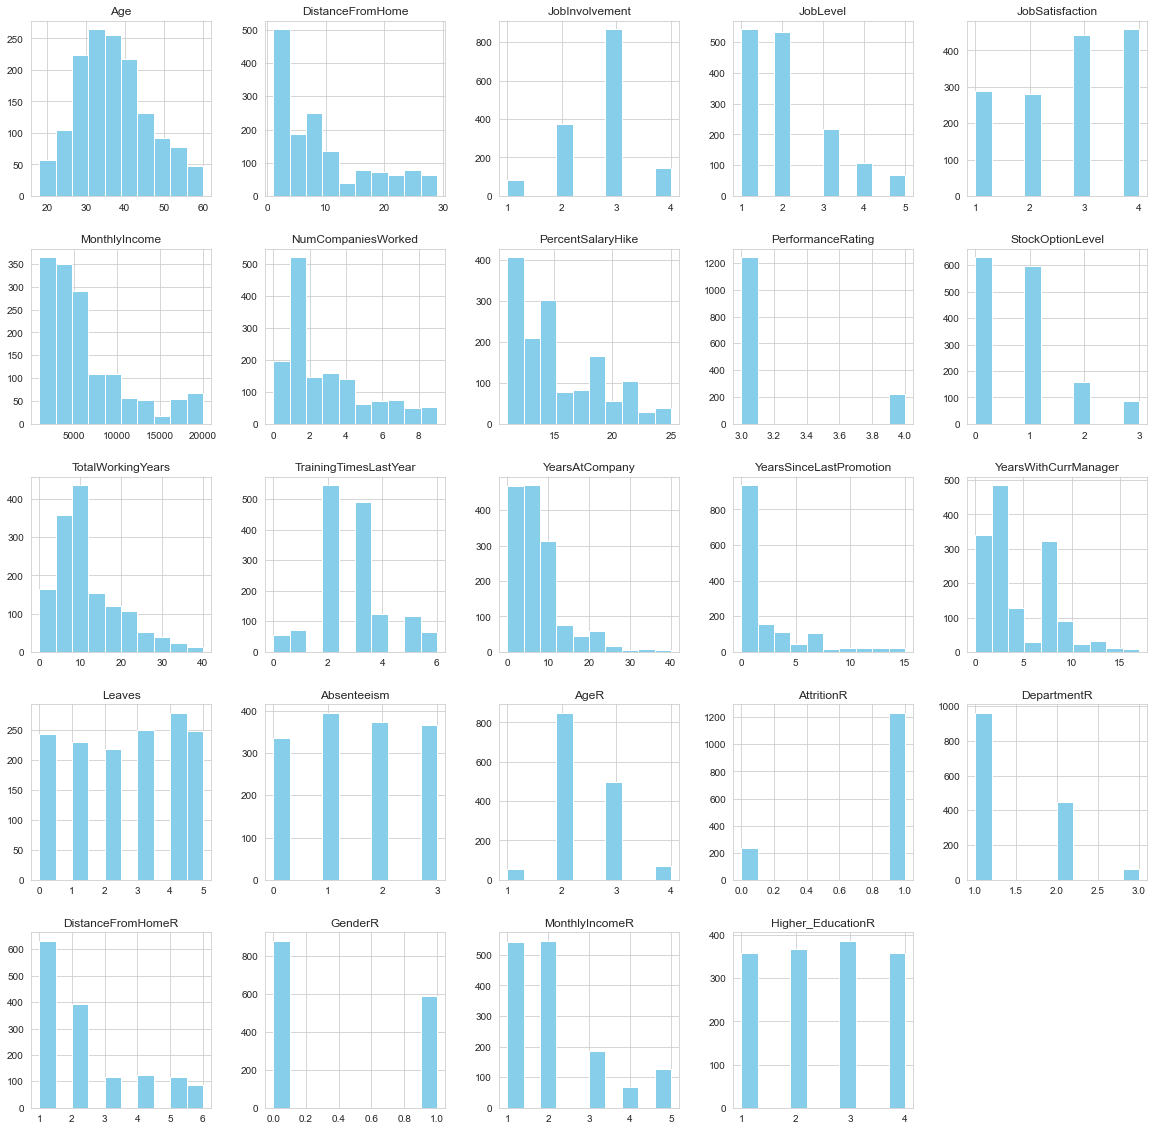

In [50]:
attrition.hist(figsize=(20,20),color = 'skyblue')

<AxesSubplot:>

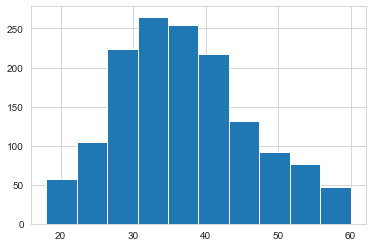

In [39]:
attrition['Age'].hist()

<AxesSubplot:>

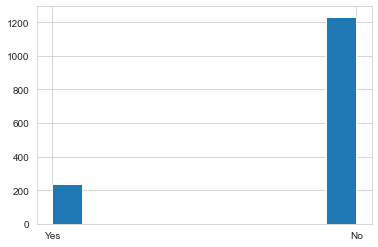

In [32]:
attrition['Attrition'].hist()

<AxesSubplot:>

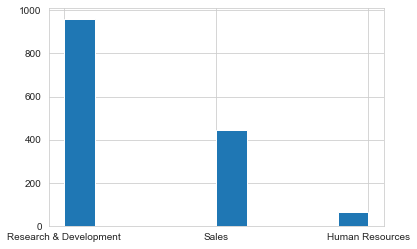

In [41]:
attrition['Department'].hist()

<AxesSubplot:>

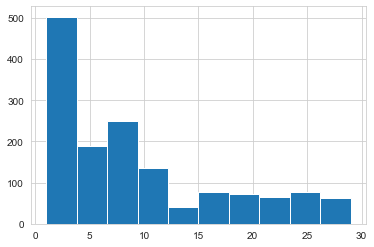

In [43]:
attrition['DistanceFromHome'].hist()

<AxesSubplot:>

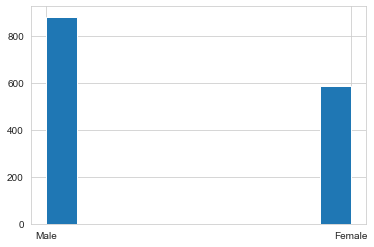

In [44]:
attrition['Gender'].hist()

<AxesSubplot:>

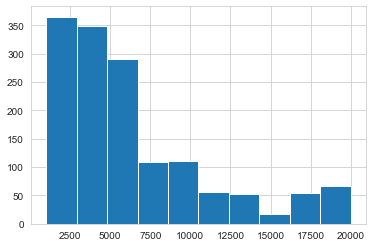

In [45]:
attrition['MonthlyIncome'].hist()

<AxesSubplot:>

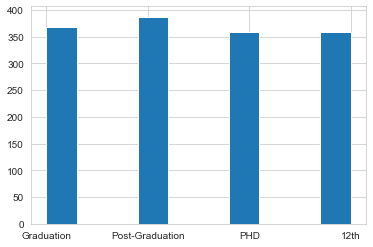

In [46]:
attrition['Higher_Education'].hist()

## Independent Chi-Square 
* To determine if the categorical variables: 'AgeR', 'DepartmentR', 'DistanceFromHomeR', 'GenderR', 'MonthlyIncomeR','Higher_EducationR' influence Attrition.
* Before running chi-square testing, create crosstab/contingency table to generate expected frequencies for the analysis and review that values int the array are all greater than 5

In [77]:
attrition_crosstab = pd.crosstab(attrition['DistanceFromHomeR'], attrition['Attrition'])

In [78]:
attrition_crosstab

Attrition,No,Yes
DistanceFromHomeR,,
1,545,87
2,337,57
3,90,25
4,102,23
5,85,32
6,74,13


In [79]:
stats.chi2_contingency(attrition_crosstab)

(17.552928199740194,
 0.0035621928630322707,
 5,
 array([[530.10612245, 101.89387755],
        [330.47755102,  63.52244898],
        [ 96.45918367,  18.54081633],
        [104.84693878,  20.15306122],
        [ 98.13673469,  18.86326531],
        [ 72.97346939,  14.02653061]]))

In [ ]:
# pval = 0.0035621928630322707 which is less than .05
# all expected frequency counts are above 5
# There is a significant influence between DistanceFromHome and Attrition

In [80]:
attrition_crosstab2 = pd.crosstab(attrition['AgeR'], attrition['Attrition'])

In [81]:
attrition_crosstab2

Attrition,No,Yes
AgeR,,
1,30,27
2,702,147
3,443,52
4,58,11


In [82]:
stats.chi2_contingency(attrition_crosstab2)

(53.595755680890704,
 1.3684295600664271e-11,
 3,
 array([[ 47.81020408,   9.18979592],
        [712.12040816, 136.87959184],
        [415.19387755,  79.80612245],
        [ 57.8755102 ,  11.1244898 ]]))

In [ ]:
# pval = 1.3684295600664271e-11 which is less than .05
# all expected frequency counts are above 5
# There is a significant influence between Age and Attrition

In [85]:
attrition_crosstab3 = pd.crosstab(attrition['DepartmentR'], attrition['Attrition'])

In [86]:
attrition_crosstab3

Attrition,No,Yes
DepartmentR,,
1,828,133
2,354,92
3,51,12


In [87]:
stats.chi2_contingency(attrition_crosstab3)

(10.796007322410668,
 0.004525606574479639,
 2,
 array([[806.06326531, 154.93673469],
        [374.09387755,  71.90612245],
        [ 52.84285714,  10.15714286]]))

In [33]:
# pval = 0.004525606574479639 which is less than .05
# all expected frequency counts are above 5
# There is a significant influence between Department and Attrition

In [34]:
attrition_crosstab4 = pd.crosstab(attrition['GenderR'], attrition['Attrition'])

In [35]:
attrition_crosstab4

Attrition,No,Yes
GenderR,,
0,732,150
1,501,87


In [36]:
stats.chi2_contingency(attrition_crosstab4)

(1.1169671241970978,
 0.29057244902890855,
 1,
 array([[739.8, 142.2],
        [493.2,  94.8]]))

In [37]:
# pval = 0.29057244902890855 and is not less than .05
# all expected frequency counts are above 5
# There is NOT a significant influence between Gender and Attrition

In [38]:
attrition_crosstab5 = pd.crosstab(attrition['MonthlyIncomeR'], attrition['Attrition'])

In [39]:
attrition_crosstab5

Attrition,No,Yes
MonthlyIncomeR,,
1,406,137
2,486,60
3,157,29
4,63,6
5,121,5


In [40]:
stats.chi2_contingency(attrition_crosstab5)

(60.564722151327345,
 2.207177246381586e-12,
 4,
 array([[455.45510204,  87.54489796],
        [457.97142857,  88.02857143],
        [156.0122449 ,  29.9877551 ],
        [ 57.8755102 ,  11.1244898 ],
        [105.68571429,  20.31428571]]))

In [42]:
# pval = 2.207177246381586e-12 which is less than .05
# all expected frequency counts are above 5
# There is a significant influence between MontlhyIncome and Attrition

In [43]:
attrition_crosstab6 = pd.crosstab(attrition['Higher_EducationR'], attrition['Attrition'])

In [44]:
attrition_crosstab6

Attrition,No,Yes
Higher_EducationR,,
1,300,58
2,309,58
3,323,64
4,301,57


In [45]:
stats.chi2_contingency(attrition_crosstab6)

(0.08914232682512083,
 0.9931077635408382,
 3,
 array([[300.28163265,  57.71836735],
        [307.83061224,  59.16938776],
        [324.60612245,  62.39387755],
        [300.28163265,  57.71836735]]))

In [46]:
# pval = 0.9931077635408382 and is not less than .05
# all expected frequency counts are above 5
# There is NOT a significant influence between Higher_Education and Attrition

In [47]:
# Independent Chi-Square testing reveals that Age, Department, DistanceFromHome, and MonthlyIncome have a significant influence on attrition while, 
# Gender and Higher_Education do NOT.

## Correlation matrix

In [104]:
attrition.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism,AgeR,AttritionR,DepartmentR,DistanceFromHomeR,GenderR,MonthlyIncomeR,Higher_EducationR
Age,1.0,-0.0017,0.03,0.51,-0.0049,0.5,0.3,0.0036,0.0019,0.038,0.68,-0.02,0.31,0.22,0.2,0.034,-0.0046,0.9,0.16,-0.0077,0.0087,0.036,0.48,-0.024
DistanceFromHome,-0.0017,1.0,0.0088,0.0053,-0.0037,-0.017,-0.029,0.04,0.027,0.045,0.0046,-0.037,0.0095,0.01,0.014,-0.023,0.025,0.015,-0.078,0.0022,0.99,0.0019,-0.00088,-0.011
JobInvolvement,0.03,0.0088,1.0,-0.013,-0.021,-0.015,0.015,-0.017,-0.029,0.022,-0.0055,-0.015,-0.021,-0.024,0.026,0.017,-0.00044,0.034,0.13,-0.018,0.0078,-0.018,-0.014,0.028
JobLevel,0.51,0.0053,-0.013,1.0,-0.0019,0.95,0.14,-0.035,-0.021,0.014,0.78,-0.018,0.53,0.35,0.38,0.028,-0.013,0.47,0.17,0.088,0.008,0.039,0.95,-0.014
JobSatisfaction,-0.0049,-0.0037,-0.021,-0.0019,1.0,-0.0072,-0.056,0.02,0.0023,0.011,-0.02,-0.0058,-0.0038,-0.018,-0.028,-0.045,-0.027,-0.023,0.1,-0.0062,-0.0058,-0.033,-0.018,-0.012
MonthlyIncome,0.5,-0.017,-0.015,0.95,-0.0072,1.0,0.15,-0.027,-0.017,0.0054,0.77,-0.022,0.51,0.34,0.34,0.0026,-0.019,0.46,0.16,0.057,-0.014,0.032,0.98,-0.0045
NumCompaniesWorked,0.3,-0.029,0.015,0.14,-0.056,0.15,1.0,-0.01,-0.014,0.03,0.24,-0.066,-0.12,-0.037,-0.11,0.019,-0.01,0.27,-0.043,-0.011,-0.03,0.039,0.14,-0.057
PercentSalaryHike,0.0036,0.04,-0.017,-0.035,0.02,-0.027,-0.01,1.0,0.77,0.0075,-0.021,-0.0052,-0.036,-0.022,-0.012,-0.0058,-0.005,0.0042,0.013,-0.035,0.044,-0.0027,-0.021,-0.017
PerformanceRating,0.0019,0.027,-0.029,-0.021,0.0023,-0.017,-0.014,0.77,1.0,0.0035,0.0067,-0.016,0.0034,0.018,0.023,-0.0061,-0.015,0.01,-0.0029,-0.03,0.033,0.014,-0.015,-0.0026
StockOptionLevel,0.038,0.045,0.022,0.014,0.011,0.0054,0.03,0.0075,0.0035,1.0,0.01,0.011,0.015,0.014,0.025,0.015,0.02,0.057,0.14,-0.016,0.052,-0.013,0.0052,0.021


In [ ]:
# correlation value between 0 and 1, positive or negative, 
# The larger the correlation value, the more closely related the two variables are.
# positive = directly proportional
# negative = inversely proportional

### Correlation Matrix Results 
### The following variables are closely related to each other:
* Age and TotalWorkingYears = 0.68
* JobLevel and TotalWorkingYears = 0.78
* JobLevel and MonthlyIncome = 0.95
* MonthlyIncome and TotalWorkingYears = 0.77
* PercentSalaryHike and PerformanceRating = 0.77
* TotalWorkingYears and YearsAtCompany = 0.63
* YearsAtCompany and YearsSinceLastPromotion = 0.62
* YearsAtCompany and YearsWithCurrManager = 0.77

### The following variables appear to have little to no relationship:
* DistanceFromHome
* JobInvolvement
* JobSatisfaction
* NumCompaniesWorked
* StockOptionLevel
* TrainingTimesLastYear
* Leaves
* Absenteeism

In [48]:
# using seaborn

<AxesSubplot:>

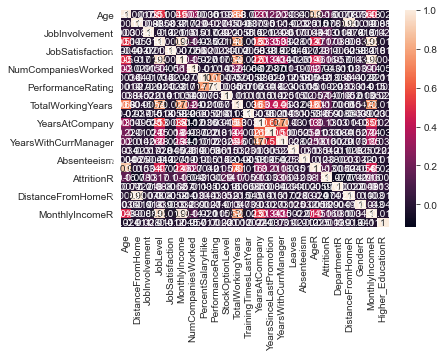

In [55]:
sns.heatmap(attrition.corr(), annot=True)

In [57]:
attrition.mean()

Age                          36.923810
DistanceFromHome              9.192517
JobInvolvement                2.729932
JobLevel                      2.063946
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
PercentSalaryHike            15.209524
PerformanceRating             3.153741
StockOptionLevel              0.793878
TotalWorkingYears            11.279592
TrainingTimesLastYear         2.799320
YearsAtCompany                7.008163
YearsSinceLastPromotion       2.187755
YearsWithCurrManager          4.123129
Leaves                        2.568707
Absenteeism                   1.525170
AgeR                          2.391837
AttritionR                    0.838776
DepartmentR                   1.389116
DistanceFromHomeR             2.293878
GenderR                       0.400000
MonthlyIncomeR                2.108163
Higher_EducationR             2.506803
dtype: float64

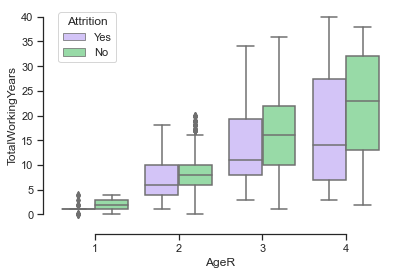

In [70]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x= "AgeR", y="TotalWorkingYears", hue="Attrition", palette=["m", "g"], data=attrition)
sns.despine(offset=10, trim=True)